<a href="https://colab.research.google.com/github/ArTeDS/Assessment-of-methods-for-predicting-the-NBA-regular-season-MVP-using-Regression-analysis-and-Classi/blob/main/NBA_regular_season_MVP_prediction_assessment_of_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The necessary imports   

In [1]:
#@title
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from operator import itemgetter
 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, make_scorer, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Loading the data

In [2]:
#@title
# The train dataset
mvp_votings = pd.read_csv('mvp_votings.csv')
# mvp_votings.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
mvp_votings.drop('Unnamed: 0', 1, inplace= True)

# All players for that season are in thius dataset.
test_data = pd.read_csv('test_data.csv')
# test_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
test_data.drop('Unnamed: 0', 1, inplace= True)

# Shortlist based on actual results of the 2018-19 season that we are predicting for
test_data2 = pd.read_csv('test_data2.csv')
test_data2.drop('Unnamed: 0', 1, inplace= True)

In [3]:
#@title
# the columns of the dataframe
mvp_votings.columns

Index(['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm', 'season',
       'player', 'win_pct', 'votes_first', 'points_won', 'points_max',
       'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws',
       'ws_per_48'],
      dtype='object')

In [4]:
#@title
# The dataframe
mvp_votings.head(5)

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [8]:
#@title
# Our predicting dataframe
test_data

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,player,win_pct,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,24.5,13.2,11.0,30.6,0.616,40.5,11.7,James Harden,0.646341,78,36.8,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254
1,17.3,2.8,9.5,30.9,0.644,32.3,10.8,Giannis Antetokounmpo,0.731707,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
2,8.8,0.0,6.4,24.6,0.682,17.8,7.0,Rudy Gobert,0.609756,81,31.8,15.9,12.9,2.0,0.8,2.3,0.669,NaN,0.636,14.4,0.268
3,19.2,8.0,6.4,23.7,0.588,29.3,5.5,Damian Lillard,0.646341,80,35.5,25.8,4.6,6.9,1.1,0.4,0.444,0.369,0.912,12.1,0.205
4,21.0,9.8,7.0,23.3,0.583,29.5,5.5,Paul George,0.597561,77,36.9,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201
5,15.1,3.4,4.4,26.3,0.589,27.4,9.5,Nikola Jokic,0.658537,80,31.3,20.1,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226
6,17.7,5.0,6.5,24.2,0.631,29.0,4.3,Kevin Durant,0.695122,78,34.6,26.0,6.4,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204
7,10.9,0.0,3.9,23.8,0.658,18.2,2.9,Clint Capela,0.646341,67,33.6,16.6,12.7,1.4,0.7,1.5,0.648,NaN,0.636,10.8,0.230
8,17.1,4.6,5.8,26.3,0.622,28.9,6.8,Karl-Anthony Towns,0.439024,77,33.1,24.4,12.4,3.4,0.9,1.6,0.518,0.400,0.836,10.4,0.197
9,16.9,2.9,2.8,25.5,0.573,28.0,6.4,Nikola Vucevic,0.512195,80,31.4,20.8,12.0,3.8,1.0,1.1,0.518,0.364,0.789,10.1,0.193


In [9]:
#@title
# The final shortlist of the players that were awarded a share of the votes
test_data2

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,player,win_pct,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,24.5,13.2,11.0,30.6,0.616,40.5,11.7,James Harden,0.646341,78,36.8,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254
1,17.3,2.8,9.5,30.9,0.644,32.3,10.8,Giannis Antetokounmpo,0.731707,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
2,8.8,0.0,6.4,24.6,0.682,17.8,7.0,Rudy Gobert,0.609756,81,31.8,15.9,12.9,2.0,0.8,2.3,0.669,NaN,0.636,14.4,0.268
3,19.2,8.0,6.4,23.7,0.588,29.3,5.5,Damian Lillard,0.646341,80,35.5,25.8,4.6,6.9,1.1,0.4,0.444,0.369,0.912,12.1,0.205
4,21.0,9.8,7.0,23.3,0.583,29.5,5.5,Paul George,0.597561,77,36.9,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201
5,15.1,3.4,4.4,26.3,0.589,27.4,9.5,Nikola Jokic,0.658537,80,31.3,20.1,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226
6,17.7,5.0,6.5,24.2,0.631,29.0,4.3,Kevin Durant,0.695122,78,34.6,26.0,6.4,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204
7,19.4,11.7,4.2,24.4,0.641,30.4,6.3,Stephen Curry,0.695122,69,33.8,27.3,5.3,5.2,1.3,0.4,0.472,0.437,0.916,9.7,0.199
8,18.8,5.0,7.1,25.8,0.606,30.3,5.0,Kawhi Leonard,0.707317,60,34.0,26.6,7.3,3.3,1.8,0.4,0.496,0.371,0.854,9.5,0.224
9,18.7,4.1,10.1,26.1,0.593,33.3,4.1,Joel Embiid,0.621951,64,33.7,27.5,13.6,3.7,0.7,1.9,0.484,0.300,0.804,8.7,0.194


### Creating a different dataframe that will be used for the classification

In [ ]:
#@title
# We are going to use the same dataset once more, only this time we are going to rename it for convinience
class_mvp = mvp_votings
# class_mvp.head()

# Creating the target classes to predict.
# I will find the players that have been awarded the MVP award based on the award share and create 2 classes. If award_share = max for a season, then this is the MVP for the given season
# If MVP = 1, the minority class and if not MVP = 0, the majority class. Thus making this a binary classification problem

mvp_idx = class_mvp.groupby(['season'])['award_share'].transform(max)==class_mvp['award_share']

# Adding a new column to specify the classes of the MVP
class_mvp['MVP'] = 0
class_mvp.loc[mvp_idx, 'MVP'] = 1
class_mvp.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,0
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,0


## Minor EDA

Exploring relationships between the various attributes of the dataset.  
We will make some plots to help us understand better the attributes of our dataset and how these attributes relate and effect each other.  
For the purposes of our analysis, our predictions for the NBA regular season MVP will be based in a dataset containing data from the 1980-81 season. This season was the first when the way the MVP selection changed and ever since it has been more or less the same up untill now.  
A selection of arround 100 sports casters and jurnalists are voting who will get the award. Before that, the players also participated in the selection.  
Our dataset is collected from www.basketball-referrence.com , a well known website with a lot of NBA statistics. This dataset contains historical data from season 1980-81 and up untill 2017-18, from the past winners of the awards and the final shortlist that got voted. We also have a test dataset, from season 2018-19, that will be used to make our predictions. That is because the data were collected at that point in order to make a prediction for the 2018-19 season MVP.

In [ ]:
#@title
# Checking for missing values
mvp_votings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fga          637 non-null    float64
 1   fg3a         637 non-null    float64
 2   fta          637 non-null    float64
 3   per          637 non-null    float64
 4   ts_pct       637 non-null    float64
 5   usg_pct      637 non-null    float64
 6   bpm          637 non-null    float64
 7   season       637 non-null    object 
 8   player       637 non-null    object 
 9   win_pct      637 non-null    float64
 10  votes_first  637 non-null    float64
 11  points_won   637 non-null    float64
 12  points_max   637 non-null    float64
 13  award_share  637 non-null    float64
 14  g            637 non-null    float64
 15  mp_per_g     637 non-null    float64
 16  pts_per_g    637 non-null    float64
 17  trb_per_g    637 non-null    float64
 18  ast_per_g    637 non-null    float64
 19  stl_per_

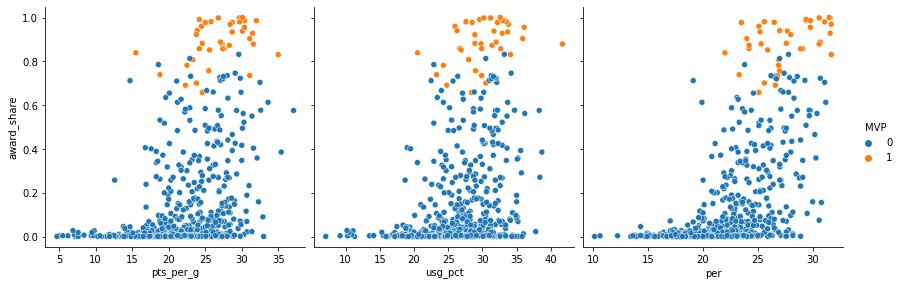

In [ ]:
#@title
# Multi scatter plot
sns.pairplot(class_mvp, x_vars=['pts_per_g', 'usg_pct', 'per'], 
             y_vars='award_share', height=4, aspect=1, kind='scatter', hue='MVP', diag_kind=None)
# sns.set_theme(font_scale=9.0)
plt.show()

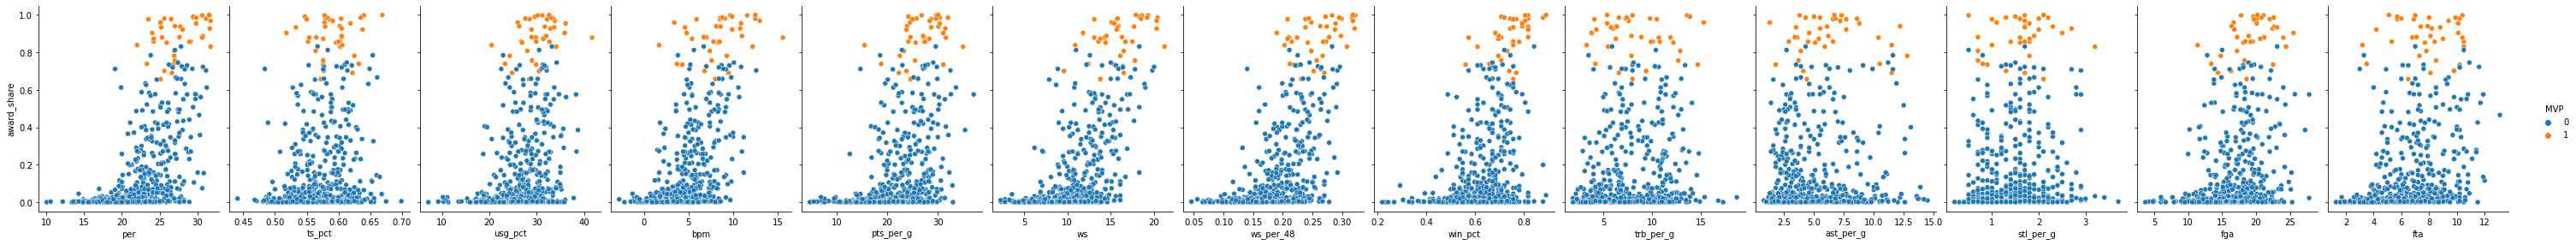

In [ ]:
#@title
sns.pairplot(class_mvp, 
             x_vars=['per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'ws', 'ws_per_48',
                      'win_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'fga', 'fta'], 
             y_vars='award_share', height=4, aspect=0.8, kind='scatter', hue='MVP', diag_kind=None)
# sns.set_theme(font_scale=9.0)
plt.show()

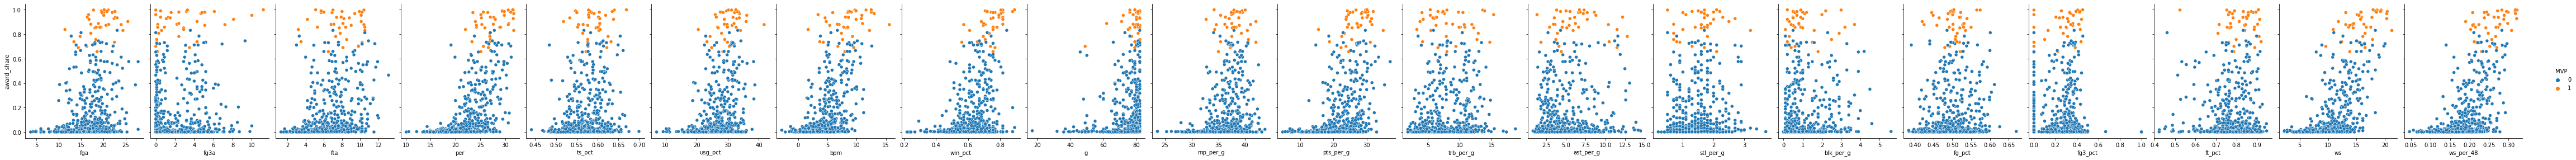

In [ ]:
#@title
sns.pairplot(class_mvp,
             x_vars=['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm', 'win_pct', 'g', 'mp_per_g', 'pts_per_g',
                      'trb_per_g', 'ast_per_g','stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws','ws_per_48'],
            y_vars='award_share', height=4, aspect=0.8, kind='scatter', hue='MVP', diag_kind=None)
# sns.set_theme(font_scale=9.0)
plt.show()

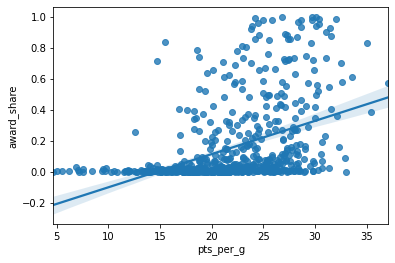

In [ ]:
#@title
# Points per game
ppg = sns.regplot(data = class_mvp, x = "pts_per_g", y = "award_share")
plt.show()
# plt.savefig("ppg.jpeg")

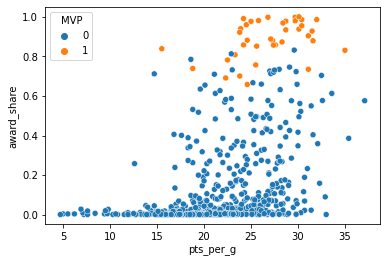

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "pts_per_g", y = "award_share", hue='MVP')
plt.show()

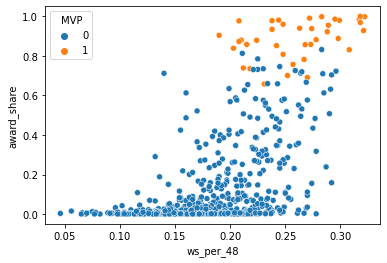

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "ws_per_48", y = "award_share", hue='MVP')
plt.show()

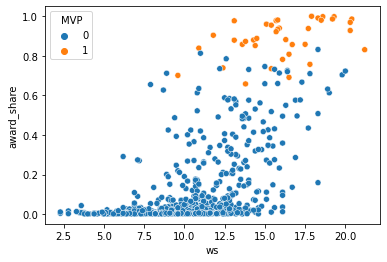

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "ws", y = "award_share", hue='MVP')
plt.show()

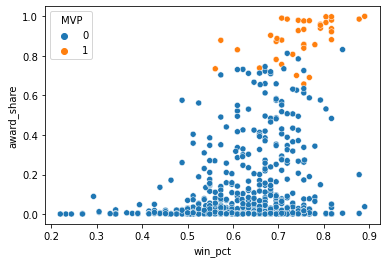

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "win_pct", y = "award_share", hue='MVP')
plt.show()

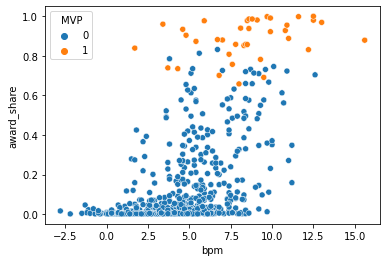

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "bpm", y = "award_share", hue='MVP')
plt.show()

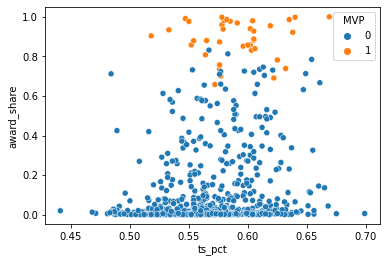

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "ts_pct", y = "award_share", hue='MVP')
plt.show()

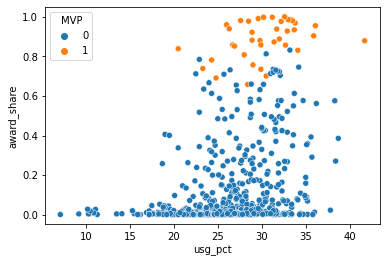

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "usg_pct", y = "award_share", hue='MVP')
plt.show()

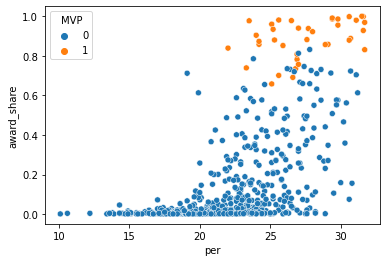

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "per", y = "award_share", hue='MVP')
plt.show()

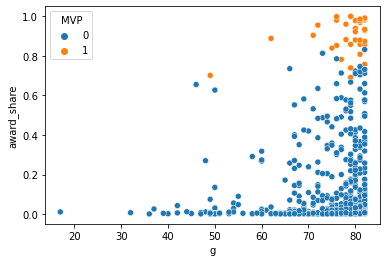

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "g", y = "award_share", hue='MVP')
plt.show()

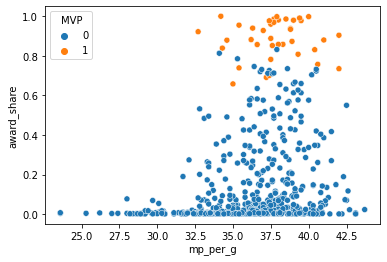

In [ ]:
#@title
sns.scatterplot(data = class_mvp, x = "mp_per_g", y = "award_share", hue='MVP')
plt.show()

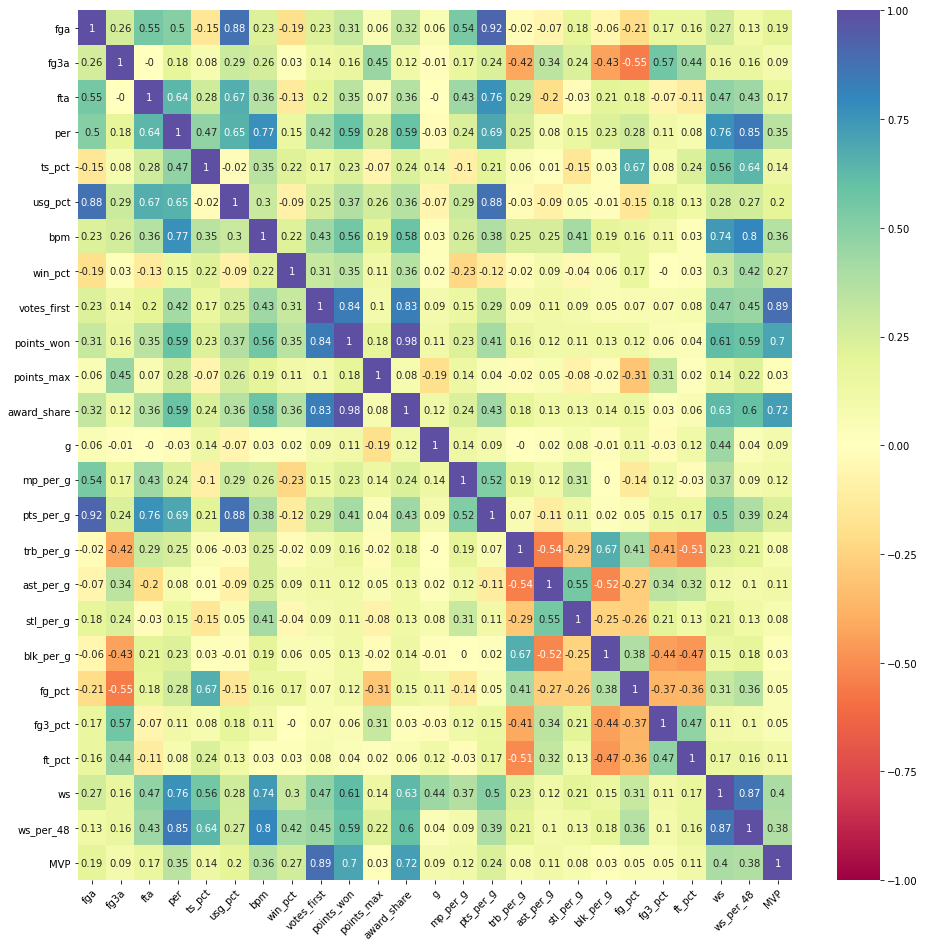

In [ ]:
#@title
# Correlation map
plt.figure(figsize=(16, 16))
sns.heatmap(mvp_votings.corr().round(decimals=2), annot=True, center=0.0, vmin=-1.0, vmax=1.0, robust=True, cmap="Spectral")

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(rotation='horizontal', rotation_mode="anchor")
plt.show()

#### Observations:

<br>

By observing the above correlation matrix for the dataset, we can see that some attributes have a strong correlation with the award share, which is the attribute that defines the winner of the MVP award. There are also a lot of attributes that have slim to zero and these attributres will be excluded from our feature selection for predicting the 2018-19 NBA regular season MVP.

We are now going to make a new Correlation MAtrix with opnly the feature that we will be using in our project.

These features are:

*'per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'ws', 'ws_per_48', 'win_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'fga', 'fta', 'mp_per_game'*

The relative glossary from [Basketball Reference](https://www.basketball-reference.com/about/glossary.html)

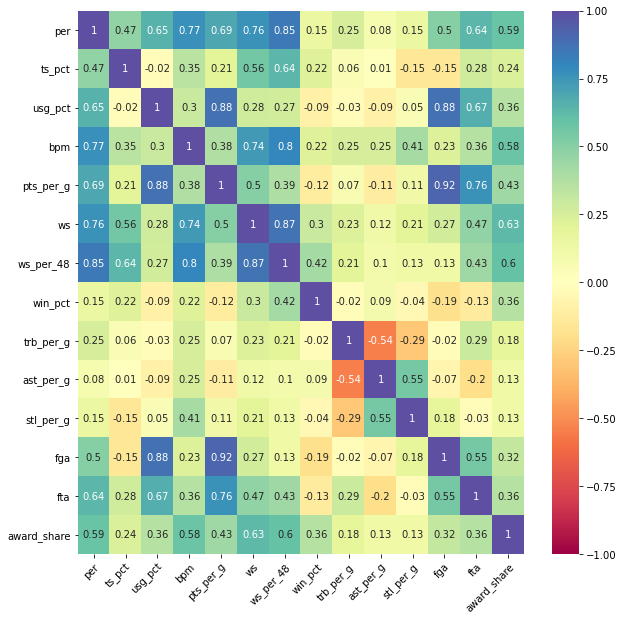

In [ ]:
#@title
# Feature selection correlation Matrix

plt.figure(figsize=(10, 10))
sns.heatmap(mvp_votings[['per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'ws', 'ws_per_48',                      
                         'win_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'fga', 'fta'] + ['award_share'] ].corr().round(decimals=2),
                          annot=True, center=0.0, vmin=-1.0, vmax=1.0, robust=True, cmap="Spectral")

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(rotation='horizontal', rotation_mode="anchor")
plt.show()

## Regression Models Selection

### Feature reduction testing wioth the use of statistical tests

In [17]:
#@title
# Investigating which features should be used

reg_features = mvp_votings[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'bpm',
                            'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']]
y_reg = mvp_votings[['award_share']]

# Creating the selector for featrue extraction
f_regression_features = SelectKBest(f_regression, k=13)

# X = f_regression_features.fit_transform(reg_features, y_reg)
        
# Fitting the selector
f_regression_features.fit(reg_features, y_reg)
# Get columns to keep and create new dataframe with those only
cols = f_regression_features.get_support(indices=True)
features_df_new = reg_features.iloc[:,cols]
features_df_new.columns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['fga', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'mp_per_g',
       'pts_per_g', 'bpm', 'trb_per_g', 'fg_pct', 'ws', 'ws_per_48'],
      dtype='object')

In [18]:
#@title
# The features selected
features = ['per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'ws', 'ws_per_48',
            'win_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'fga', 'fta']

# features = ['fga', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'mp_per_g',
#                'pts_per_g', 'bpm', 'trb_per_g', 'fg_pct', 'ws', 'ws_per_48']


# defining features X and target label, y, for the cross validation proccess including all values of the dataset
X_mvp = mvp_votings[features]

# the prediction target
y_mvp = mvp_votings[['award_share']]

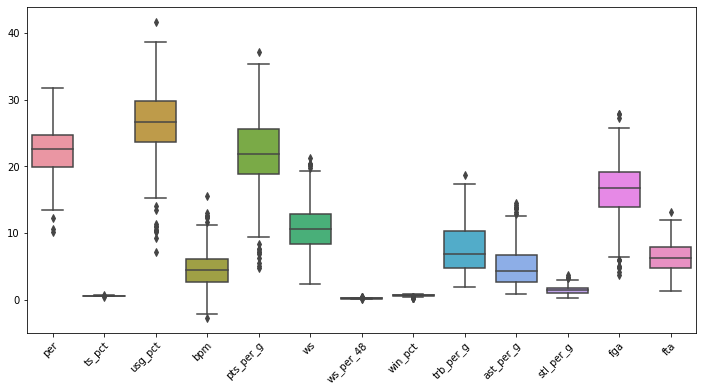

In [19]:
#@title
plt.figure(figsize=(12, 6))
sns.boxplot(data=mvp_votings[features])
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.show()

<Figure size 576x576 with 0 Axes>

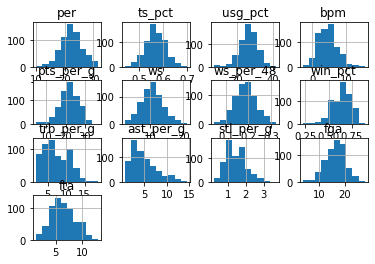

In [20]:
#@title
plt.figure(figsize=(8, 8))
plt.tight_layout()
mvp_votings[features].hist()
plt.show()

In [21]:
#@title
# # feature scaling and transformation

# scaled = StandardScaler().fit_transform(X_mvp)
# X_mvp_std = pd.DataFrame(scaled, columns=features, index=mvp_votings.index)
# # X_mvp_std.describe()

# scaled2 = StandardScaler().fit_transform(test_data2[features])
# test_data2_std = pd.DataFrame(scaled2, columns=features, index=test_data2.index)
# # test_data2_std.describe()

#### Metrics for evaluating regression models


<br>

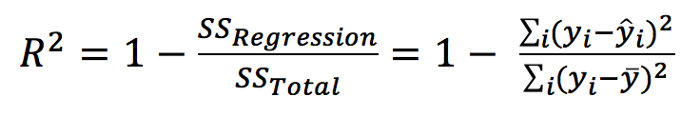




$MSE = \frac{1}{N}\sum_{i=1}^{N} (Predicted_i - Actual_i)$

$RMSE = \sqrt{MSE}$

$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N} (Predicted_i - Actual_i)}$


In [22]:
#@title
# Creating utility functions

# scoring metrics for regression
regression_scores = {'R^2 score' : 'r2',
                     'Explained Variance':'explained_variance',
                     #'max_error':'max_error',
                     'MSE':'neg_mean_squared_error',
                     'RMSE' : make_scorer(mean_squared_error, squared=False),
                     #'neg_mean_absolute_error':'neg_mean_absolute_error'
                     }

# Function for K fold cross validation
def cross_validation_scores(model, X, y, scoring, CV):    
    '''
    Cross-validation metrics
    
    param_model: model
    param_X: features
    param_y: target label
    param_scoring: a selection of metrics
    param_CV: how many folds for cross validation
    '''
    # K-fold Cross Validation
    scores = cross_validate(model, X, y.values.ravel(), scoring=scoring, cv=CV)

    # Getting the score mean and standard deviation of each metric
    return {metric: (round(np.mean(scores), 3),
                     [round(np.std(scores), 3)]) for metric, scores in scores.items()}

# Function to report the scoring metrics
def model_report(data, name='name'):
    '''
    a utility function to create a dataframe with the scoring metrics of the estimators
    param data: the scoring a model
    param name: the name of the estimator on the table
    '''
    df = pd.DataFrame()
    df = pd.DataFrame.from_dict([data])
    df['Model'] = name
    df = df.set_index('Model')
   
    return df

In [23]:
#@title
# get a stacking ensemble of models
def regression_ensemble():
    '''
    A utility function to create a stacking regressor ensemble 
    '''
    # base models
    level0 = list()
    level0.append(('linreg', lin_reg))    
    level0.append(('svr', svr_reg))    
    level0.append(('rf', rf_reg))
    # meta learner model
    level1 = lin_reg
    # stacking ensemble
    stack_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
    return stack_model

# print(regression_ensemble())

## Regression Models Evaluation

### Linear Regression Model

In [ ]:
#@title
lin_reg = LinearRegression()
print('Linear Regression 10-fold cross validation metrics: '  )
linreg_report = cross_validation_scores(lin_reg, X_mvp, y_mvp, regression_scores, 10)
linreg_report

Linear Regression 10-fold cross validation metrics: 


{'fit_time': (0.006, [0.005]),
 'score_time': (0.004, [0.001]),
 'test_R^2 score': (0.487, [0.101]),
 'test_Explained Variance': (0.531, [0.092]),
 'test_MSE': (-0.033, [0.009]),
 'test_RMSE': (0.181, [0.024])}

### SVM regressor

In [ ]:
#@title
svr_reg = SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.1)
print('SVR 10-fold cross validation metrics: ' )
svr_report = cross_validation_scores(svr_reg, X_mvp, y_mvp, regression_scores, 10)
svr_report

SVR 10-fold cross validation metrics: 


{'fit_time': (0.042, [0.005]),
 'score_time': (0.007, [0.001]),
 'test_R^2 score': (0.545, [0.147]),
 'test_Explained Variance': (0.571, [0.145]),
 'test_MSE': (-0.03, [0.012]),
 'test_RMSE': (0.169, [0.034])}

### Random Forest Regressor

In [ ]:
#@title
rf_reg = RandomForestRegressor(random_state=0,
                               n_estimators=200,
                               criterion='mse')

print('Random Forest Regressor 10-fold cross validation metrics: ' )
rf_report = cross_validation_scores(rf_reg, X_mvp, y_mvp, regression_scores, 10)
rf_report

Random Forest Regressor 10-fold cross validation metrics: 


{'fit_time': (1.619, [0.201]),
 'score_time': (0.041, [0.018]),
 'test_R^2 score': (0.592, [0.148]),
 'test_Explained Variance': (0.614, [0.149]),
 'test_MSE': (-0.027, [0.011]),
 'test_RMSE': (0.16, [0.034])}

### Stacking Regression Ensemble

In [ ]:
#@title
ensemble_reg = regression_ensemble()
print('Regression Stucking Ensemble 10-fold cross validation metrics:')
ensemble_reg_report = cross_validation_scores(ensemble_reg, X_mvp, y_mvp, regression_scores, 10)
ensemble_reg_report

Regression Stucking Ensemble 10-fold cross validation metrics:


{'fit_time': (15.923, [3.022]),
 'score_time': (0.05, [0.02]),
 'test_R^2 score': (0.614, [0.142]),
 'test_Explained Variance': (0.647, [0.14]),
 'test_MSE': (-0.025, [0.011]),
 'test_RMSE': (0.156, [0.034])}

### Model Evaluation Table

In [ ]:
#@title
# Creating a table with the metrics
regression_report = pd.DataFrame()
regression_report = regression_report.append(model_report(linreg_report, name='Linear Regression'))
regression_report = regression_report.append(model_report(svr_report, name='SVR'))
regression_report = regression_report.append(model_report(rf_report, name='Random Forest'))
regression_report = regression_report.append(model_report(ensemble_reg_report, name='Regression Ensemble'))

In [ ]:
#@title
# Shorting the results based on the RMSE error
regression_report.sort_values(by=['test_RMSE'], ascending=True)

,fit_time,score_time,test_R^2 score,test_Explained Variance,test_MSE,test_RMSE
Model,,,,,,
Regression Ensemble,"(15.923, [3.022])","(0.05, [0.02])","(0.614, [0.142])","(0.647, [0.14])","(-0.025, [0.011])","(0.156, [0.034])"
Random Forest,"(1.619, [0.201])","(0.041, [0.018])","(0.592, [0.148])","(0.614, [0.149])","(-0.027, [0.011])","(0.16, [0.034])"
SVR,"(0.042, [0.005])","(0.007, [0.001])","(0.545, [0.147])","(0.571, [0.145])","(-0.03, [0.012])","(0.169, [0.034])"
Linear Regression,"(0.006, [0.005])","(0.004, [0.001])","(0.487, [0.101])","(0.531, [0.092])","(-0.033, [0.009])","(0.181, [0.024])"


_We are evaluating our models using a 10-fold cross valiation_

##### MSE = Mean Square Error  
##### RMSE = Root Mean Square Error

# Predictions for the 2018-19 season with Regression models

In [ ]:
#@title
# We will use the data set that derived from the initial test dataset
# This dataset includes the players that were in the final shortlist for that season.

test_data2

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,player,win_pct,g,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,24.5,13.2,11.0,30.6,0.616,40.5,11.7,James Harden,0.646341,78,...,36.1,6.6,7.5,2.0,0.7,0.442,0.368,0.879,15.2,0.254
1,17.3,2.8,9.5,30.9,0.644,32.3,10.8,Giannis Antetokounmpo,0.731707,72,...,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292
2,8.8,0.0,6.4,24.6,0.682,17.8,7.0,Rudy Gobert,0.609756,81,...,15.9,12.9,2.0,0.8,2.3,0.669,NaN,0.636,14.4,0.268
3,19.2,8.0,6.4,23.7,0.588,29.3,5.5,Damian Lillard,0.646341,80,...,25.8,4.6,6.9,1.1,0.4,0.444,0.369,0.912,12.1,0.205
4,21.0,9.8,7.0,23.3,0.583,29.5,5.5,Paul George,0.597561,77,...,28.0,8.2,4.1,2.2,0.4,0.438,0.386,0.839,11.9,0.201
5,15.1,3.4,4.4,26.3,0.589,27.4,9.5,Nikola Jokic,0.658537,80,...,20.1,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226
6,17.7,5.0,6.5,24.2,0.631,29.0,4.3,Kevin Durant,0.695122,78,...,26.0,6.4,5.9,0.7,1.1,0.521,0.353,0.885,11.5,0.204
7,19.4,11.7,4.2,24.4,0.641,30.4,6.3,Stephen Curry,0.695122,69,...,27.3,5.3,5.2,1.3,0.4,0.472,0.437,0.916,9.7,0.199
8,18.8,5.0,7.1,25.8,0.606,30.3,5.0,Kawhi Leonard,0.707317,60,...,26.6,7.3,3.3,1.8,0.4,0.496,0.371,0.854,9.5,0.224
9,18.7,4.1,10.1,26.1,0.593,33.3,4.1,Joel Embiid,0.621951,64,...,27.5,13.6,3.7,0.7,1.9,0.484,0.300,0.804,8.7,0.194


## Linear Regression Prediction

In [ ]:
#@title
lin_reg.fit(X_mvp, y_mvp.values.ravel())

# Creating a list with the predictions
linregPredict = lin_reg.predict(test_data2[features]).round(decimals=2)
# Pair the names and predictions
linregListUnsorted = [[i, j] for i, j in zip(test_data2['player'], linregPredict)]
linregList = sorted(linregListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
linreg_df = pd.DataFrame(linregList)
linreg_df.rename(columns = {0:'Player Name', 1:'Award Share LinReg'}, inplace=True)

# Creating a new index starting from 1 for better display of the results
linreg_df.index = linreg_df.index + 1
linreg_df

,Player Name,Award Share LinReg
1,James Harden,0.63
2,Giannis Antetokounmpo,0.54
3,Nikola Jokic,0.32
4,Damian Lillard,0.28
5,Kevin Durant,0.27
6,Joel Embiid,0.26
7,Stephen Curry,0.24
8,Russell Westbrook,0.24
9,Paul George,0.23
10,Kawhi Leonard,0.20


<AxesSubplot:xlabel='Award Share LinReg', ylabel='Player Name'>

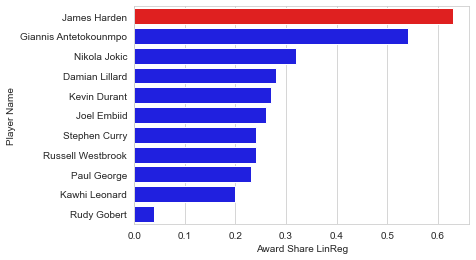

In [ ]:
#@title
# Plot the results
sns.set_style("whitegrid")
sns.barplot(y=linreg_df['Player Name'], x=linreg_df['Award Share LinReg'],
            palette=['blue' if (x < max(linreg_df['Award Share LinReg'])) else 'red' for x in linreg_df['Award Share LinReg']])

## SVR Predict

In [ ]:
#@title
svr_reg.fit(X_mvp, y_mvp.values.ravel())

# Creating a list with the predictions
svrPredict = svr_reg.predict(test_data2[features]).round(decimals=2)
# Pair the names and predictions
svrListUnsorted = [[i, j] for i, j in zip(test_data2['player'], svrPredict)]
svrList = sorted(svrListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
svr_df = pd.DataFrame(svrList)
svr_df.rename(columns = {0:'Player Name', 1:'Award Share SVR'}, inplace = True)

# Creating a new index starting from 1 for better display of the results
svr_df.index = svr_df.index + 1
svr_df

,Player Name,Award Share SVR
1,James Harden,0.63
2,Giannis Antetokounmpo,0.62
3,Nikola Jokic,0.36
4,Joel Embiid,0.20
5,Russell Westbrook,0.18
6,Damian Lillard,0.17
7,Paul George,0.17
8,Kevin Durant,0.17
9,Rudy Gobert,0.16
10,Stephen Curry,0.14


<AxesSubplot:xlabel='Award Share SVR', ylabel='Player Name'>

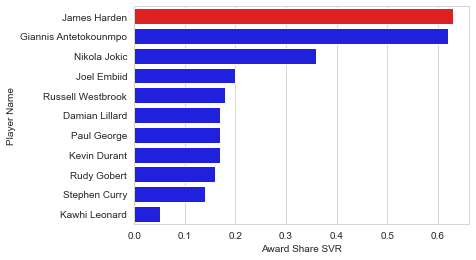

In [ ]:
#@title
# Plot the results
sns.set_style("whitegrid")
sns.barplot(y=svr_df['Player Name'], x=svr_df['Award Share SVR'],
            palette=['blue' if (x < max(svr_df['Award Share SVR'])) else 'red' for x in svr_df['Award Share SVR']])

## Random Forest Regression Prediction

In [ ]:
#@title
rf_reg.fit(X_mvp, y_mvp.values.ravel())

# Creating a list with the predictions
rfPredict = rf_reg.predict(test_data2[features]).round(decimals=2)
# Pair the names and predictions
rfListUnsorted = [[i, j] for i, j in zip(test_data2['player'], rfPredict)]
rfList = sorted(rfListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
rf_df = pd.DataFrame(rfList)
rf_df.rename(columns = {0:'Player Name', 1:'Award Share RF'}, inplace=True)

# Creating a new index starting from 1 for better display of the results
rf_df.index = rf_df.index + 1
rf_df

,Player Name,Award Share RF
1,Giannis Antetokounmpo,0.65
2,James Harden,0.59
3,Rudy Gobert,0.21
4,Nikola Jokic,0.20
5,Kawhi Leonard,0.19
6,Stephen Curry,0.14
7,Paul George,0.13
8,Kevin Durant,0.13
9,Joel Embiid,0.12
10,Russell Westbrook,0.10


<AxesSubplot:xlabel='Award Share RF', ylabel='Player Name'>

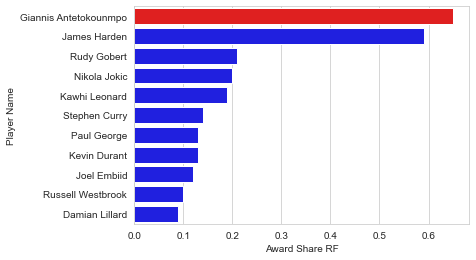

In [ ]:
#@title
# Plot the results
sns.set_style("whitegrid")
sns.barplot(y=rf_df['Player Name'], x=rf_df['Award Share RF'],
            palette=['blue' if (x < max(rf_df['Award Share RF'])) else 'red' for x in rf_df['Award Share RF'] ])

## Stacking Regression Ensemble Model Prediction

In [ ]:
#@title
ensemble_reg.fit(X_mvp, y_mvp.values.ravel())

# Creating a list with the predictions
ensemblePredict = ensemble_reg.predict(test_data2[features]).round(decimals=2)
# Pair the names and predictions
ensembleListUnsorted = [[i, j] for i, j in zip(test_data2['player'], ensemblePredict)]
ensembleList = sorted(ensembleListUnsorted, key=lambda x:x[1], reverse=True)

# Creating a dataframe from the list of predictions
ensemble_df = pd.DataFrame(ensembleList)
ensemble_df.rename(columns = {0:'Player Name', 1:'Award Share Ensemble'}, inplace = True)

# Creating a new index starting from 1 for better display of the results
ensemble_df.index = ensemble_df.index + 1
ensemble_df

,Player Name,Award Share Ensemble
1,Giannis Antetokounmpo,0.67
2,James Harden,0.65
3,Nikola Jokic,0.27
4,Kevin Durant,0.17
5,Rudy Gobert,0.16
6,Paul George,0.16
7,Stephen Curry,0.16
8,Kawhi Leonard,0.16
9,Joel Embiid,0.16
10,Damian Lillard,0.14


<AxesSubplot:xlabel='Award Share Ensemble', ylabel='Player Name'>

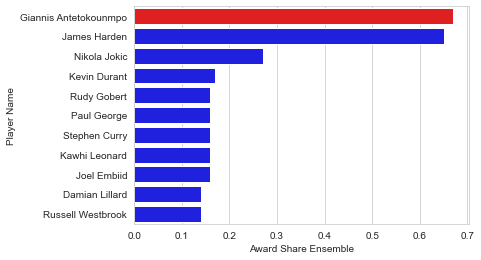

In [ ]:
#@title
# Plot the results
sns.set_style("whitegrid")
sns.barplot(y=ensemble_df['Player Name'], x=ensemble_df['Award Share Ensemble'],
            palette=['blue' if (x < max(ensemble_df['Award Share Ensemble'])) else 'red' for x in ensemble_df['Award Share Ensemble'] ])

## Results in a table

In [ ]:
#@title
# Putting together the predictions of all the algorithms
predictionsRegression = pd.merge(linreg_df, svr_df, on='Player Name')
predictionsRegression = pd.merge(predictionsRegression, rf_df, on='Player Name')
predictionsRegression = pd.merge(predictionsRegression, ensemble_df, on='Player Name')

# Changing the index
predictionsRegression.index = predictionsRegression.index + 1
predictionsRegression

,Player Name,Award Share LinReg,Award Share SVR,Award Share RF,Award Share Ensemble
1,James Harden,0.63,0.63,0.59,0.65
2,Giannis Antetokounmpo,0.54,0.62,0.65,0.67
3,Nikola Jokic,0.32,0.36,0.20,0.27
4,Damian Lillard,0.28,0.17,0.09,0.14
5,Kevin Durant,0.27,0.17,0.13,0.17
6,Joel Embiid,0.26,0.20,0.12,0.16
7,Stephen Curry,0.24,0.14,0.14,0.16
8,Russell Westbrook,0.24,0.18,0.10,0.14
9,Paul George,0.23,0.17,0.13,0.16
10,Kawhi Leonard,0.20,0.05,0.19,0.16


## Classification Models Prediction

In [ ]:
#@title
# We are going to use the same dataset once more, only this time we are going to rename it for convinience
class_mvp = mvp_votings
class_mvp.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,0
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,0


In [ ]:
#@title
# Creating the target classes to predict.
# I will find the players that have been awarded the MVP award based on the award share and create 2 classes. If award_share = max for a season, then this is the MVP for the given season
# If MVP = 1, the minority class and if not MVP = 0, the majority class. Thus making this a binary classification problem

mvp_idx = class_mvp.groupby(['season'])['award_share'].transform(max)==class_mvp['award_share']

# Adding a new column to specify the classes of the MVP
class_mvp['MVP'] = 0
class_mvp.loc[mvp_idx, 'MVP'] = 1

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

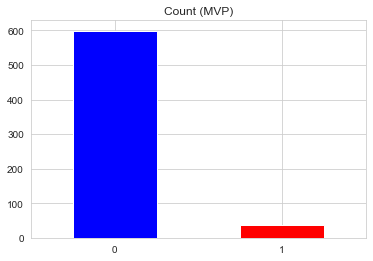

In [ ]:
#@title
# Ploting the classes of the dataset
class_mvp.MVP.value_counts().plot(kind='bar', title='Count (MVP)', color=['b', 'red'])
plt.xticks(rotation='horizontal', rotation_mode="anchor")

##### Observations:

<br>

We clearly have an imbalance between the 2 classes as we can see from the plot.  
We have 38 entries in the minority class 1 (won MVP), corresponding to 6% of the data and 599 in majority class 0 (not won MVP), corresponding to 94% of the data.  
This gives a ratio of 1/16 which shows that the classes are heavily imbalanced.  
We will test reducing the number of instances in the majority class.  
We will not truy to oversample the minority class, because there can be only one MVP per season.  
  
We will use different precision as the performance metric to evaluate the models.

In [ ]:
#@title
# The new column 'MVP' , that contains the MVP classification
class_mvp.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,0
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,0


### Testing to undersample the majority class by removing all players that received 2% or less of the vote share

In [ ]:
#@title
# len(class_mvp[class_mvp['award_share'] <= 0.02])

In [ ]:
#@title
# # In order to deal with the class imbalance we will remove the players that received les that 0.5% vote share

# class_mvp.drop(class_mvp.index[class_mvp['award_share'] <= 0.02], inplace = True)
# class_mvp.reset_index(inplace = True)
# class_mvp.drop('index', 1, inplace= True)
# class_mvp

In [ ]:
#@title
# class_mvp

In [ ]:
#@title
# # Ploting the classes of the dataset again
# class_mvp.MVP.value_counts().plot(kind='bar', title='Count (MVP)', color=['b', 'red'])
# plt.xticks(rotation='horizontal', rotation_mode="anchor")

In [ ]:
#@title
# # All the players that have won the MVP award in our dataset
# class_mvp[class_mvp['MVP']==True][['season', 'player', 'award_share', 'MVP']].head()

## Classification models

In [ ]:
#@title
class_mvp.columns

Index(['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm', 'season',
       'player', 'win_pct', 'votes_first', 'points_won', 'points_max',
       'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws',
       'ws_per_48', 'MVP'],
      dtype='object')

In [ ]:
#@title
class_mvp.describe()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,win_pct,votes_first,points_won,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,MVP
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.00000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,16.493878,1.990738,6.431868,22.451491,0.568061,26.456829,4.55573,0.630860,6.362637,165.382889,...,7.430298,4.985086,1.428728,0.983046,0.494264,0.256515,0.779834,10.689639,0.187165,0.059655
std,3.885812,2.205053,2.220213,3.731392,0.039137,4.869641,2.69811,0.108075,20.226226,284.177362,...,3.292937,2.838656,0.586569,0.933544,0.045071,0.154165,0.087450,3.377285,0.048531,0.237032
min,3.700000,0.000000,1.300000,10.100000,0.441000,7.100000,-2.80000,0.219512,0.000000,1.000000,...,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000,0.000000
25%,13.900000,0.100000,4.800000,19.900000,0.542000,23.600000,2.60000,0.560976,0.000000,3.000000,...,4.800000,2.700000,1.000000,0.300000,0.463000,0.167000,0.737000,8.400000,0.155000,0.000000
50%,16.700000,1.000000,6.200000,22.600000,0.566000,26.600000,4.50000,0.646341,0.000000,22.000000,...,6.900000,4.300000,1.400000,0.600000,0.492000,0.300000,0.789000,10.600000,0.186000,0.000000
75%,19.100000,3.600000,7.900000,24.700000,0.596000,29.800000,6.10000,0.707317,1.000000,183.000000,...,10.300000,6.700000,1.800000,1.400000,0.523000,0.364000,0.842000,12.900000,0.218000,0.000000
max,27.800000,11.200000,13.100000,31.700000,0.699000,41.700000,15.60000,0.890244,131.000000,1310.000000,...,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000,1.000000


### Features extraction

In [ ]:
#@title
# Investigating which features should be used
# Using ANOVA F value test

# Without BPM
classification_features = class_mvp[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g', 'mp_per_g', 'pts_per_g',
                                        'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']]

# Inclusive BPM
# classification_features = class_mvp[['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g', 'mp_per_g', 'pts_per_g', 'bpm',
#                                         'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']]

y_class = class_mvp[['MVP']]

# Create a feature selector for different values of K (number of features) using X square test
# f_classif_features = SelectKBest(f_classif, k=11)
f_classif_features = SelectKBest(f_classif, k=15)
# f_classif_features = SelectKBest(f_classif, k=17)


# # This is not needed as we will manually pickthe features in our case
# # X = f_classif_features.fit_transform(classification_features, y_class)
        
# Fiting the selector
f_classif_features.fit(classification_features, y_class)
# chi2_features.fit(classification_features, y_class)

# Extract the features (columns) that were selected from SelectKbest
# cols = chi2_features.get_support(indices=True)
cols = f_classif_features.get_support(indices=True)

classification_features_df = classification_features.iloc[:,cols]
classification_features_df.columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
       'mp_per_g', 'pts_per_g', 'ast_per_g', 'stl_per_g', 'ft_pct', 'ws',
       'ws_per_48'],
      dtype='object')

In [ ]:
#@title
# Feature selection testing based on ANNOVA F value test

# features = ['fga', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'pts_per_g', 'ws', 'ws_per_48']
# features = ['fga', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'mp_per_g', 'pts_per_g', 'ast_per_g', 'ws', 'ws_per_48']
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'mp_per_g', 'pts_per_g', 'ast_per_g', 'ft_pct', 'ws', 'ws_per_48']

# # K=14
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
#                'mp_per_g', 'pts_per_g', 'ast_per_g', 'ft_pct', 'ws', 'ws_per_48']

# K = 15
# # without bpm
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
#                'mp_per_g', 'pts_per_g', 'ast_per_g', 'stl_per_g', 'ft_pct', 'ws', 'ws_per_48']
# # with bpm
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
#        'mp_per_g', 'pts_per_g', 'bpm', 'ast_per_g', 'ft_pct', 'ws', 'ws_per_48']

# # K=16
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g', 'mp_per_g', 
#             'pts_per_g', 'bpm', 'ast_per_g', 'stl_per_g', 'ft_pct', 'ws', 'ws_per_48']

# # K=17
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
#                'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
#                'fg3_pct', 'ft_pct', 'ws', 'ws_per_48']

# # K=18
# features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'win_pct', 'g',
#        'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g',
#        'fg_pct', 'fg3_pct', 'ft_pct', 'ws', 'ws_per_48'] 


# # the prediction target
# target = ['MVP']

## Feature Selection

In [ ]:
#@title
# After testing we concluded that the same features like in regression analysis, will be used

# The features selected
features = ['per', 'ts_pct', 'usg_pct', 'bpm', 'pts_per_g', 'ws', 'ws_per_48',
            'win_pct', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'fga', 'fta']

# defining features X and target label, y, for the cross validation proccess including all values of the dataset
target = ['MVP']

## Evaluation Metrics  

Accuracy, Recall, Precision  

Since we have a very imbalanced classification problem to address, we are not going to use the Accuracy of the models as our metric.  
This is because model accuracy is heavily affected by the fact that the majority class is more than 90 %. Instead we will be using the Precision and the  Confusion Matrix.  
This way we can evaluate the model on their ability to correctly predict the minority class that is the one defining who will be awarded MVP.  
 
The procedure we are going to use for evaluating the models is based on the Leave-One-Group-Out method. More specifically we will be leaving one season (group) out of the training sample each time and then use it to test the models, for each of the 37 seasons included in our training data set. This way, the models will be actually evaluated in unknown data each time.  

After that we will make a prediction for the 2018-19 season using our test data that was included in our dataset.

In [ ]:
#@title
# A selection of classification algorithms
# Defining the models with some basic paramemeters. No hypertunning

# Logistic Regression classifier
log_clsf = LogisticRegression(solver='liblinear', random_state=42, multi_class='ovr') # liblinear for small datasets and ovr for binary problem

# Linear Discriminant Analysis classifier
lda_clsf = LinearDiscriminantAnalysis(solver='svd') # solver{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’ // default is recomended for data with largw number of features

# Support Vector Machines classifier
svc_clsf = SVC(kernel='linear',
               C=7,
               probability=True,
               random_state=42)

# Naive Bayes Gaussian
bayes_clsf = GaussianNB()

# Random Forest classifier
rf_clsf = RandomForestClassifier(n_estimators=200,
                                 oob_score=True,
                                 max_features=None,
                                 random_state=0)

In [ ]:
#@title
# get a stacking ensemble of models
# We will use as base 4
def classification_ensemble():
    '''
    A function to create a stucking ensemble of specific algorithms 
    '''
    # define the base models
    level0 = list()
    level0.append(('Bayes', bayes_clsf))
    level0.append(('log', log_clsf))
    level0.append(('LDA', lda_clsf))   
    level0.append(('SVC', svc_clsf))       
    # define meta learner model
    level1 = log_clsf
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

ensemble_clsf = classification_ensemble()

### Notes:  
We will try and compute the propability of a player being the MVP of a given season.  
In our binary classification problem, this means that instead of predicting classes 1 or 0, the algorithm is going to find how likely it is for a given player, to be the MVP of a specific season.  
We are therefore going to use model.predict_proba instead of model.predict, to fit our data to the models.  

In [ ]:
#@title
# Defining some utility functions

# Function to report the scoring metrics (same as in regression analysis)
def model_report(data, name='name'):
    '''
    a utility function to create a dataframe with the scoring metrics of the estimators
    param data: the scoring a model
    param name: the name of the estimator on the table
    '''
    df = pd.DataFrame()
    df = pd.DataFrame.from_dict([data])
    df['Model'] = name
    df = df.set_index('Model')
   
    return df

# A simple function to fit a model, that returns the prediction propability of a class 
def fit_pred_proba(model, x, y, pred):
    '''
    A function to fit an algorithm and return the prediction propability
    
    param_model: the algorithm model to fit
    param_x,y: the training features and target labels
    param_pred: the test data for predicting
    '''
    model.fit(x, y)
    # We  predict the propability of the minority class 1 = won MVP
    return model.predict_proba(pred)[:, 1]

# A cross validation function
def evaluate(model, df):
    '''
    A function to evaluate classification models using the leave-one-group-out method. The models are trained on all seasons of the dataset except one that is left out for testing.
    Predictions are made on all seasons of the dataset. The predictive outcome is the propability of a player to be classified in the minority class (1).
    Based on this propability, players are then assigned a rank and the one that scores the highest is predicted MVP for the given season.
    
    param model: the predictive algorithm
    param df: the data provided in a dataframe
    
    output: it returns a dataframe containing all predictions with their predicted propability and the corresponding ranking.
    '''
    # to store the predictions of the model
    prediction_df = []
    
    # a loop to select one season for testing each time
    for season in df['season'].unique():

        # Taking out one season for testing
        test_season = df[df['season'] == season]
        # Remaining seasons used for training
        train_season = df[df['season'] != season]

        x = train_season[features]
        y = train_season[target].values.ravel()
        pred = test_season[features]

        # Fitting the model
        pred_propabilities = fit_pred_proba(model, x, y, pred)     

        predictions = test_season.copy()
        predictions['mvp_propability'] = pred_propabilities

        prediction_df.append(predictions)

    # Create a dataframe with the predictions of the model
    df = pd.concat(prediction_df)
    df = df[['MVP', 'player', 'season', 'mvp_propability']]

    # The column that will contain the predictive rank for each player, based on their propability of being the MVP
    df['mvp_pred_rank'] = df.groupby('season')['mvp_propability'].rank(ascending = False, method = 'dense')

    return df#.head()

## Evaluating the models

## Logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MVPs prediction accuracy:  60.53 % 

The model's predictions:
 True Positives: 584 
 False Positives:  15 
 False Negatives:  15 
 True Positives:  23 

The metrics:
Accuracy: 0.953
Recall: 0.605
Precision: 0.605
F1: 0.605
Area under ROC curve: 0.873 



Text(0.5, 1.007, 'Logistic Regression ROC Curve')

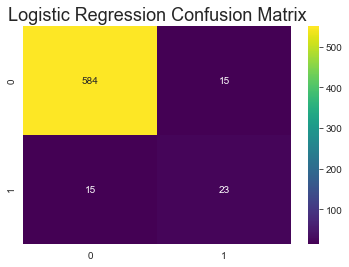

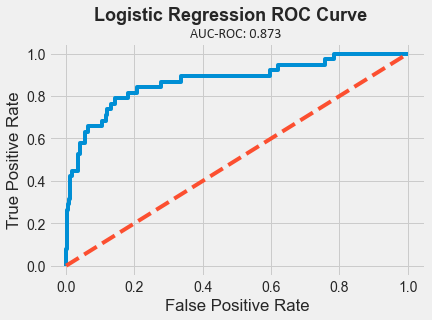

In [ ]:
#@title
# Evaluating the model
pred_log = evaluate(log_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners of the MVP award are defined by the highest propability given in the Predicted Winner ('pred_winner') column of the dataset.
# Winners for each season are classified with the minority class 1 and all the others are classified with the majority class 0

pred_log['mvp_winner'] = pred_log['mvp_pred_rank']
pred_log['mvp_winner'].loc[pred_log['mvp_winner'] != 1] = 0

# The number of players that were correctly predicted
# print('The number of MVPs that were correctly predicted: ', len(pred_log[(pred_log['MVP'] == 1) & (pred_log['mvp_pred_rank'] == 1)]))
# The total number of MVPs in the dataset, that is 38
# print('The total number of MVPs in the dataset: ', len(pred_log[pred_log['mvp_winner'] == 1]), '\n')

# The accuracy of the MVP predictions (how many MVP were predicted correclty and not the total ammount of corect predictions for both classes)
print("MVPs prediction accuracy: ", round((len(pred_log[(pred_log['MVP'] == 1) & (pred_log['mvp_pred_rank'] == 1)]) / len(pred_log[pred_log['MVP'] == 1]))*100 , 2), '%', '\n')

# find the model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_log[(pred_log['MVP'] == 1) & (pred_log['mvp_pred_rank'] != 1)]))
# pred_log[(pred_log['MVP'] == 1) & (pred_log['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_log[(pred_log['MVP'] != 1) & (pred_log['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_log['MVP'] != 1) & (pred_log['mvp_winner'] == 1)]

# calculate model metrics
ytest = pred_log['MVP']
y_pred = pred_log['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

log_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % log_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# print("F1 micro: %.3f" % f1_score(ytest, y_pred, average='micro'))
# print("F1 macro: %.3f" % f1_score(ytest, y_pred, average='macro'))
# print("F1 weighted: %.3f" % f1_score(ytest, y_pred, average='weighted'))
# print("F1 binary class 1: %.3f" % f1_score(ytest, y_pred, average='binary', pos_label=1))

# The ROC score
propabilities = pred_log['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('Logistic Regression Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.873 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("Logistic Regression ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_log[pred_log['pred_winner']==True]

## Linear Discriminant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MVPs prediction accuracy:  60.53 % 

The model's predictions:
 True Positives: 584 
 False Positives:  15 
 False Negatives:  15 
 True Positives:  23 

The metrics:
Accuracy: 0.953
Recall: 0.605
Precision: 0.605
F1: 0.605
Area under ROC curve: 0.936 



Text(0.5, 1.007, 'LDA ROC Curve')

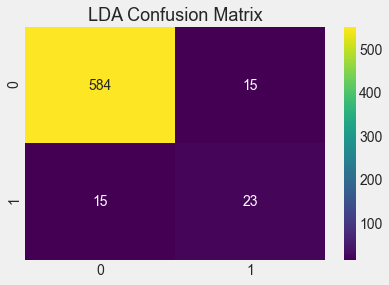

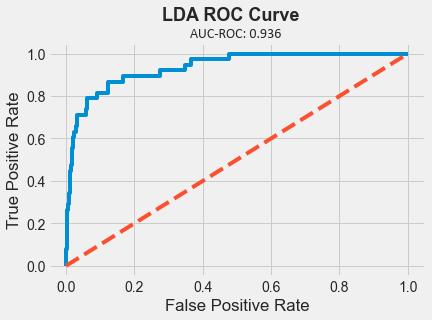

In [ ]:
#@title
# Evaluating the model
pred_lda = evaluate(lda_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners for each season are defined by the highest propability. They are classified with the minority class 1 and all the others are classified with the majority class 0

pred_lda['mvp_winner'] = pred_lda['mvp_pred_rank']
pred_lda['mvp_winner'].loc[pred_lda['mvp_winner'] != 1] = 0

# The accuracy of the MVP predictions (what percentage of players that our model predicted would win actually did)
print("MVPs prediction accuracy: ", round((len(pred_lda[(pred_lda['MVP'] == 1) & (pred_lda['mvp_pred_rank'] == 1)]) / len(pred_lda[pred_lda['MVP'] == 1]))*100 , 2), '%', '\n')

# calculate model metrics
ytest = pred_lda['MVP']
y_pred = pred_lda['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

lda_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % lda_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# The ROC score
propabilities = pred_lda['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('LDA Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.936 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("LDA ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_lda[pred_lda['pred_winner']==True]

# The model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_lda[(pred_lda['MVP'] == 1) & (pred_lda['mvp_pred_rank'] != 1)]))
# pred_log[(pred_log['MVP'] == 1) & (pred_log['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_lda[(pred_lda['MVP'] != 1) & (pred_lda['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_lda['MVP'] != 1) & (pred_lda['mvp_winner'] == 1)]

## Support Vector Machines SVC 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MVPs prediction accuracy:  71.05 % 

The model's predictions:
 True Positives: 588 
 False Positives:  11 
 False Negatives:  11 
 True Positives:  27 

The metrics:
Accuracy: 0.965
Recall: 0.711
Precision: 0.711
F1: 0.711
Area under ROC curve: 0.952 



Text(0.5, 1.007, 'SVC ROC Curve')

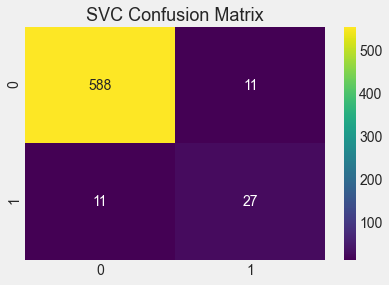

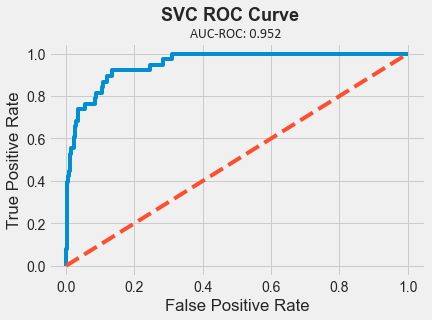

In [ ]:
#@title
# Evaluating the model
pred_svc = evaluate(svc_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners for each season are defined by the highest propability. They are classified with the minority class 1 and all the others are classified with the majority class 0

pred_svc['mvp_winner'] = pred_svc['mvp_pred_rank']
pred_svc['mvp_winner'].loc[pred_svc['mvp_winner'] != 1] = 0

# The accuracy of the MVP predictions (what percentage of players that our model predicted would win actually did)
print("MVPs prediction accuracy: ", round((len(pred_svc[(pred_svc['MVP'] == 1) & (pred_svc['mvp_pred_rank'] == 1)]) / len(pred_svc[pred_svc['MVP'] == 1]))*100 , 2), '%', '\n')

# calculate model metrics
ytest = pred_svc['MVP']
y_pred = pred_svc['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

svc_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % svc_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# The ROC score
propabilities = pred_svc['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('SVC Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.952 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("SVC ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_lda[pred_lda['pred_winner']==True]

# The model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_svc[(pred_svc['MVP'] == 1) & (pred_svc['mvp_pred_rank'] != 1)]))
# pred_log[(pred_svc['MVP'] == 1) & (pred_svc['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_svc[(pred_svc['MVP'] != 1) & (pred_svc['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_svc['MVP'] != 1) & (pred_svc['mvp_winner'] == 1)]

## Random Forest

MVPs prediction accuracy:  65.79 % 

The model's predictions:
 True Positives: 586 
 False Positives:  13 
 False Negatives:  13 
 True Positives:  25 

The metrics:
Accuracy: 0.959
Recall: 0.658
Precision: 0.658
F1: 0.658
Area under ROC curve: 0.906 



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0.5, 1.007, 'Random Forest ROC Curve')

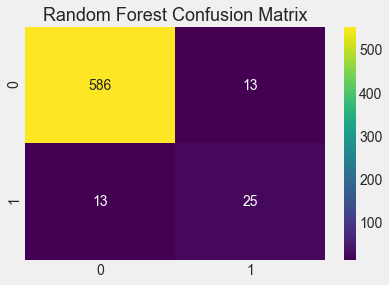

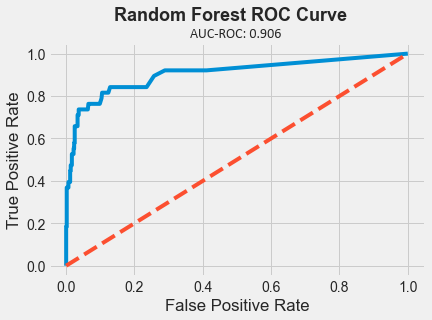

In [ ]:
#@title
# Evaluating the model
pred_rf = evaluate(rf_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners for each season are defined by the highest propability. They are classified with the minority class 1 and all the others are classified with the majority class 0

pred_rf['mvp_winner'] = pred_rf['mvp_pred_rank']
pred_rf['mvp_winner'].loc[pred_rf['mvp_winner'] != 1] = 0

# The accuracy of the MVP predictions (what percentage of players that our model predicted would win actually did)
print("MVPs prediction accuracy: ", round((len(pred_rf[(pred_rf['MVP'] == 1) & (pred_rf['mvp_pred_rank'] == 1)]) / len(pred_rf[pred_rf['MVP'] == 1]))*100 , 2), '%', '\n')

# calculate model metrics
ytest = pred_rf['MVP']
y_pred = pred_rf['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

rf_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % rf_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# The ROC score
propabilities = pred_rf['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('Random Forest Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.906 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("Random Forest ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_lda[pred_lda['pred_winner']==True]

# The model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_rf[(pred_rf['MVP'] == 1) & (pred_rf['mvp_pred_rank'] != 1)]))
# pred_log[(pred_rf['MVP'] == 1) & (pred_rf['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_rf[(pred_rf['MVP'] != 1) & (pred_rf['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_rf['MVP'] != 1) & (pred_rf['mvp_winner'] == 1)]

## Naive Bayes classifier

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MVPs prediction accuracy:  57.89 % 

The model's predictions:
 True Positives: 583 
 False Positives:  16 
 False Negatives:  16 
 True Positives:  22 

The metrics:
Accuracy: 0.950
Recall: 0.579
Precision: 0.579
F1: 0.579
Area under ROC curve: 0.920 



Text(0.5, 1.007, 'Naive Bayes ROC Curve')

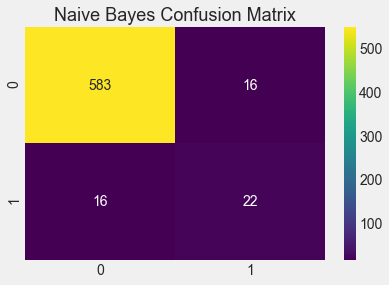

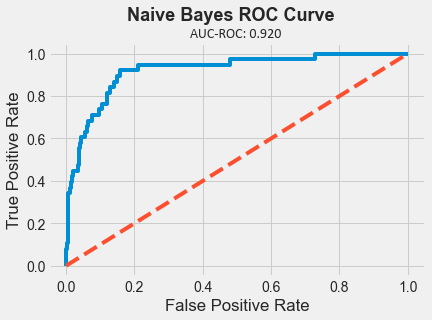

In [ ]:
#@title
# Evaluating the model
pred_bayes = evaluate(bayes_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners for each season are defined by the highest propability. They are classified with the minority class 1 and all the others are classified with the majority class 0

pred_bayes['mvp_winner'] = pred_bayes['mvp_pred_rank']
pred_bayes['mvp_winner'].loc[pred_bayes['mvp_winner'] != 1] = 0

# The accuracy of the MVP predictions (what percentage of players that our model predicted would win actually did)
print("MVPs prediction accuracy: ", round((len(pred_bayes[(pred_bayes['MVP'] == 1) & (pred_bayes['mvp_pred_rank'] == 1)]) / len(pred_bayes[pred_bayes['MVP'] == 1]))*100 , 2), '%', '\n')

# calculate model metrics
ytest = pred_bayes['MVP']
y_pred = pred_bayes['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

bayes_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % bayes_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# The ROC score
propabilities = pred_bayes['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('Naive Bayes Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.920 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("Naive Bayes ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_lda[pred_lda['pred_winner']==True]

# The model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_bayes[(pred_bayes['MVP'] == 1) & (pred_bayes['mvp_pred_rank'] != 1)]))
# pred_log[(pred_bayes['MVP'] == 1) & (pred_bayes['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_bayes[(pred_bayes['MVP'] != 1) & (pred_bayes['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_bayes['MVP'] != 1) & (pred_bayes['mvp_winner'] == 1)]

## Classification Ensemble

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


MVPs prediction accuracy:  63.16 % 

The model's predictions:
 True Positives: 585 
 False Positives:  14 
 False Negatives:  14 
 True Positives:  24 

The metrics:
Accuracy: 0.956
Recall: 0.632
Precision: 0.632
F1: 0.632
Area under ROC curve: 0.915 



Text(0.5, 1.007, 'Clasifiers Ensemble ROC Curve')

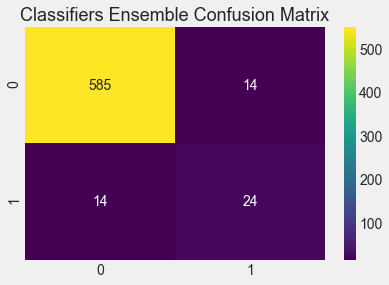

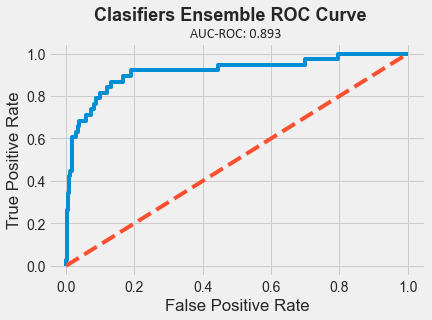

In [ ]:
#@title
# Evaluating the model
pred_ensemble = evaluate(ensemble_clsf, class_mvp)

# We are going to assign a class to all predictions to help us evaluate our model
# Winners for each season are defined by the highest propability. They are classified with the minority class 1 and all the others are classified with the majority class 0

pred_ensemble['mvp_winner'] = pred_ensemble['mvp_pred_rank']
pred_ensemble['mvp_winner'].loc[pred_ensemble['mvp_winner'] != 1] = 0

# The accuracy of the MVP predictions (what percentage of players that our model predicted would win actually did)
print("MVPs prediction accuracy: ", round((len(pred_ensemble[(pred_ensemble['MVP'] == 1) & (pred_ensemble['mvp_pred_rank'] == 1)]) / len(pred_ensemble[pred_ensemble['MVP'] == 1]))*100 , 2), '%', '\n')

# calculate model metrics
ytest = pred_ensemble['MVP']
y_pred = pred_ensemble['mvp_winner']

# The Confusion Matrix
cm = confusion_matrix(ytest, y_pred)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("The model's predictions:\n" ,
      'True Positives:' , tn, '\n',
      'False Positives: ', fp, '\n',
      'False Negatives: ' , fn, '\n',
      'True Positives: ' , tp, '\n')

# The metrics
print("The metrics:")
print("Accuracy: %.3f" % accuracy_score(ytest, y_pred))
print("Recall: %.3f" % recall_score(ytest, y_pred))

ensemble_preci = precision_score(ytest, y_pred)
print("Precision: %.3f" % ensemble_preci)
print("F1: %.3f" % f1_score(ytest, y_pred))

# The ROC score
propabilities = pred_ensemble['mvp_propability'].values
ROC_score = roc_auc_score(ytest, propabilities)
print("Area under ROC curve: %.3f" % ROC_score, '\n')

# Ploting the confusion matrix for a better visualization of the model performance metrics
sns.heatmap(cm, annot=True, robust=True, cmap="viridis", fmt='g')
plt.title('Classifiers Ensemble Confusion Matrix', fontsize = 18)

# Ploting the ROC curve and the Area Under the ROC curve
plt.style.use('fivethirtyeight')
roc, ax = plt.subplots()

fpr, tpr, _ = roc_curve(ytest, propabilities)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], linestyle = '--')

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("AUC-ROC: 0.893 ", fontname = 'Calibri', fontsize = 14)
roc.suptitle("Clasifiers Ensemble ROC Curve", weight = 'bold', y = 1.007, size = 18)

# All predicted MVPs
# pred_lda[pred_lda['pred_winner']==True]

# The model's incorrect predictions
# False negatives
# Players that were falsely predicted to not win the MVP while in reality did win it
# print('The number of False Negative predictions:', len(pred_ensemble[(pred_ensemble['MVP'] == 1) & (pred_ensemble['mvp_pred_rank'] != 1)]))
# pred_log[(pred_ensemble['MVP'] == 1) & (pred_ensemble['mvp_pred_rank'] != 1)]

# # False positive predictions
# # Players that were falsy predicted to win the MVP while in reality didnt win it
# print('The number of False Positive predictions:', len(pred_ensemble[(pred_ensemble['MVP'] != 1) & (pred_ensemble['mvp_winner'] == 1)]), '\n')
# pred_log[(pred_ensemble['MVP'] != 1) & (pred_ensemble['mvp_winner'] == 1)]

In [ ]:
#@title
# Creating a table with the metrics
classification_report = pd.DataFrame()
classification_report = classification_report.append(model_report(log_preci, name='Logistic Regression'))
classification_report = classification_report.append(model_report(lda_preci, name='LDA'))
classification_report = classification_report.append(model_report(svc_preci, name='SVC'))
classification_report = classification_report.append(model_report(rf_preci, name='Random Forest'))
classification_report = classification_report.append(model_report(bayes_preci, name='Naive Bayes'))
classification_report = classification_report.append(model_report(ensemble_preci, name='Classification Ensemble'))
classification_report= classification_report.rename(columns={0:'Precision'})
classification_report.sort_values(by='Precision', ascending=False)
# classification_report.columns
# classification_report.Precision = 100*classification_report.Precision
# classification_report

,Precision
Model,
SVC,0.710526
Random Forest,0.657895
Classification Ensemble,0.631579
Logistic Regression,0.605263
LDA,0.605263
Naive Bayes,0.578947


In [ ]:
#@title
# # Results with undersampling the majority class
# # Creating a table with the metrics
# classification_report = pd.DataFrame()
# classification_report = classification_report.append(model_report(log_preci, name='Logistic Regression'))
# classification_report = classification_report.append(model_report(lda_preci, name='LDA'))
# classification_report = classification_report.append(model_report(svc_preci, name='SVC'))
# classification_report = classification_report.append(model_report(rf_preci, name='Random Forest'))
# classification_report = classification_report.append(model_report(bayes_preci, name='Naive Bayes'))
# classification_report = classification_report.append(model_report(ensemble_preci, name='Classification Ensemble'))
# classification_report= classification_report.rename(columns={0:'Precision'})
# classification_report.sort_values(by='Precision', ascending=False)

## Predictions with the classification models

### Logistic Regression Prediction

In [ ]:
#@title
# Logistic Regression prediction
lrPredict = fit_pred_proba(log_clsf, class_mvp[features], class_mvp[target].values.ravel(), test_data2[features])

# We put the predictions in a list
predTmp = [[i, j] for i, j in zip(test_data2['player'], lrPredict)]
mvpPredictions = sorted(predTmp, key = lambda x:x[1], reverse=True)

# Create a dataframe with the predictions to make plots
lrMvpPredictions_df = pd.DataFrame(mvpPredictions)
lrMvpPredictions_df.rename(columns = {0:'Player Name', 1:'MVP Prediction Propability'}, inplace = True)

# Creating a new index to help visualize the results better
lrMvpPredictions_df.index = lrMvpPredictions_df.index + 1
lrMvpPredictions_df

,Player Name,MVP Prediction Propability
1,James Harden,0.290938
2,Damian Lillard,0.121214
3,Rudy Gobert,0.072920
4,Nikola Jokic,0.071846
5,Giannis Antetokounmpo,0.070144
6,Kevin Durant,0.038191
7,Stephen Curry,0.028406
8,Paul George,0.017258
9,Russell Westbrook,0.007293
10,Kawhi Leonard,0.001438


<AxesSubplot:xlabel='MVP Prediction Propability', ylabel='Player Name'>

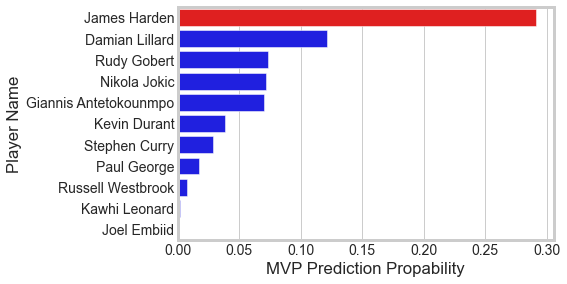

In [ ]:
#@title
# Ploting the predictions
sns.set_style("whitegrid")
sns.barplot(y=lrMvpPredictions_df['Player Name'], x=lrMvpPredictions_df['MVP Prediction Propability'],
            palette=['blue' if (x < max(lrMvpPredictions_df['MVP Prediction Propability'])) else 'red' for x in lrMvpPredictions_df['MVP Prediction Propability'] ])

### LDA Prediction

In [ ]:
#@title
# LDA prediction
ldaPredict = fit_pred_proba(lda_clsf, class_mvp[features], class_mvp[target].values.ravel(), test_data2[features])

# We put the predictions in a list
predTmp = [[i, j] for i, j in zip(test_data2['player'], ldaPredict)]
mvpPredictions = sorted(predTmp, key=lambda x:x[1], reverse=True)

# Create a dataframe with the predictions to make plots
ldaMvpPredictions_df = pd.DataFrame(mvpPredictions)
ldaMvpPredictions_df.rename(columns = {0:'Player Name', 1:'MVP Prediction Propability'}, inplace = True)

# Creating a new index to help visualize the results better
ldaMvpPredictions_df.index = ldaMvpPredictions_df.index + 1
ldaMvpPredictions_df

,Player Name,MVP Prediction Propability
1,James Harden,0.781028
2,Giannis Antetokounmpo,0.511342
3,Nikola Jokic,0.076158
4,Damian Lillard,0.059789
5,Kevin Durant,0.043920
6,Stephen Curry,0.036867
7,Russell Westbrook,0.028641
8,Paul George,0.021369
9,Joel Embiid,0.013546
10,Kawhi Leonard,0.009375


<AxesSubplot:xlabel='MVP Prediction Propability', ylabel='Player Name'>

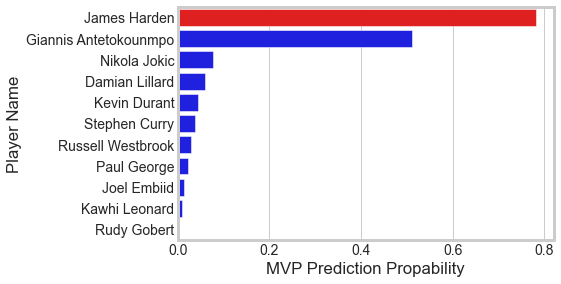

In [ ]:
#@title
# Ploting the predictions
sns.set_style("whitegrid")
sns.barplot(y=ldaMvpPredictions_df['Player Name'], x=ldaMvpPredictions_df['MVP Prediction Propability'],
            palette=['blue' if (x < max(ldaMvpPredictions_df['MVP Prediction Propability'])) else 'red' for x in ldaMvpPredictions_df['MVP Prediction Propability'] ])

### SVC Prediction

In [ ]:
#@title
# SVC prediction
svcPredict = fit_pred_proba(svc_clsf, class_mvp[features], class_mvp[target].values.ravel(), test_data2[features])

# We put the predictions in a list
predTmp = [[i, j] for i, j in zip(test_data2['player'], svcPredict)]
mvpPredictions = sorted(predTmp, key=lambda x:x[1], reverse=True)

# Create a dataframe with the predictions to make plots
svcMvpPredictions_df = pd.DataFrame(mvpPredictions)
svcMvpPredictions_df.rename(columns = {0:'Player Name', 1:'MVP Prediction Propability'}, inplace = True)

# Creating a new index to help visualize the results better
svcMvpPredictions_df.index = svcMvpPredictions_df.index + 1
svcMvpPredictions_df

,Player Name,MVP Prediction Propability
1,James Harden,0.440077
2,Giannis Antetokounmpo,0.428721
3,Nikola Jokic,0.069856
4,Kevin Durant,0.056334
5,Russell Westbrook,0.051456
6,Damian Lillard,0.043754
7,Joel Embiid,0.031440
8,Stephen Curry,0.019763
9,Kawhi Leonard,0.009878
10,Paul George,0.009604


<AxesSubplot:xlabel='MVP Prediction Propability', ylabel='Player Name'>

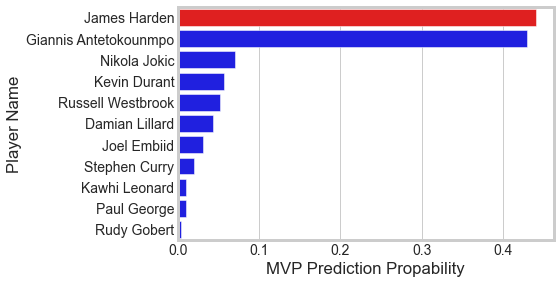

In [ ]:
#@title
# Ploting the predictions
sns.set_style("whitegrid")
sns.barplot(y=svcMvpPredictions_df['Player Name'], x=svcMvpPredictions_df['MVP Prediction Propability'],
            palette=['blue' if (x < max(svcMvpPredictions_df['MVP Prediction Propability'])) else 'red' for x in svcMvpPredictions_df['MVP Prediction Propability'] ])

### Random Forest Prediction

In [ ]:
#@title
# Random Forest Regressor prediction
rfPredict = fit_pred_proba(rf_clsf, class_mvp[features], class_mvp[target].values.ravel(), test_data2[features])

# We put the predictions in a list
predTmp = [[i, j] for i, j in zip(test_data2['player'], rfPredict)]
mvpPredictions = sorted(predTmp, key=lambda x:x[1], reverse=True)

# Create a dataframe with the predictions to make plots
rfMvpPredictions_df = pd.DataFrame(mvpPredictions)
rfMvpPredictions_df.rename(columns = {0:'Player Name', 1:'MVP Prediction Propability'}, inplace = True)

# Creating a new index to help visualize the results better
rfMvpPredictions_df.index = rfMvpPredictions_df.index + 1
rfMvpPredictions_df

,Player Name,MVP Prediction Propability
1,Giannis Antetokounmpo,0.460
2,James Harden,0.365
3,Stephen Curry,0.030
4,Rudy Gobert,0.020
5,Kevin Durant,0.010
6,Paul George,0.005
7,Nikola Jokic,0.005
8,Kawhi Leonard,0.005
9,Russell Westbrook,0.005
10,Damian Lillard,0.000


<AxesSubplot:xlabel='MVP Prediction Propability', ylabel='Player Name'>

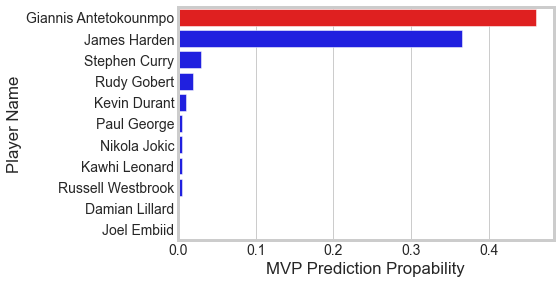

In [ ]:
#@title
# Ploting the predictions
sns.set_style("whitegrid")
sns.barplot(y=rfMvpPredictions_df['Player Name'], x=rfMvpPredictions_df['MVP Prediction Propability'],
            palette=['blue' if (x < max(rfMvpPredictions_df['MVP Prediction Propability'])) else 'red' for x in rfMvpPredictions_df['MVP Prediction Propability'] ])

## Classification Ensemble Prediction

In [ ]:
#@title
# Classifier Ensemble Predictions
clsf_ensemblePredict = fit_pred_proba(ensemble_clsf, class_mvp[features], class_mvp[target].values.ravel(), test_data2[features])

# We put the predictions in a list
predTmp = [[i, j] for i, j in zip(test_data2['player'], clsf_ensemblePredict)]
mvpPredictions = sorted(predTmp, key=lambda x:x[1], reverse=True)

# Create a dataframe with the predictions to make plots
clsf_ensemblePredict_df = pd.DataFrame(mvpPredictions)
clsf_ensemblePredict_df.rename(columns = {0:'Player Name', 1:'MVP Prediction Propability'}, inplace = True)

# Creating a new index to help visualize the results better
clsf_ensemblePredict_df.index = clsf_ensemblePredict_df.index + 1
clsf_ensemblePredict_df

,Player Name,MVP Prediction Propability
1,James Harden,0.542098
2,Giannis Antetokounmpo,0.364625
3,Nikola Jokic,0.032532
4,Damian Lillard,0.029642
5,Kevin Durant,0.027980
6,Russell Westbrook,0.026227
7,Stephen Curry,0.026171
8,Kawhi Leonard,0.025783
9,Paul George,0.024868
10,Joel Embiid,0.024812


<AxesSubplot:xlabel='MVP Prediction Propability', ylabel='Player Name'>

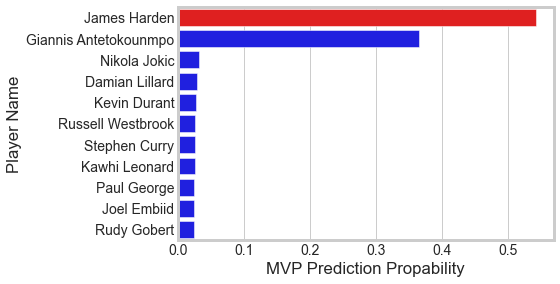

In [ ]:
#@title
# Ploting the predictions
sns.set_style("whitegrid")
sns.barplot(y=clsf_ensemblePredict_df['Player Name'], x=clsf_ensemblePredict_df['MVP Prediction Propability'],
            palette=['blue' if (x < max(clsf_ensemblePredict_df['MVP Prediction Propability'])) else 'red' for x in clsf_ensemblePredict_df['MVP Prediction Propability'] ])